In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
# First, we get the data
dataset = pd.read_csv('kesinga_spi.csv')
dataset

,sl.no,spi
0,1,-1.54
1,2,-1.54
2,3,-1.20
3,4,0.15
4,5,1.20
...,...,...
485,486,1.18
486,487,1.75
487,488,1.79
488,489,1.49


In [6]:
# Checking for missing values
# training_set = dataset[:'360'].iloc[:,1:2].values
# test_set = dataset['361':].iloc[:,1:2].values
# Checking for missing values
training_set = dataset.iloc[:361, 1:2].values
test_set = dataset.iloc[361:, 1:2].values


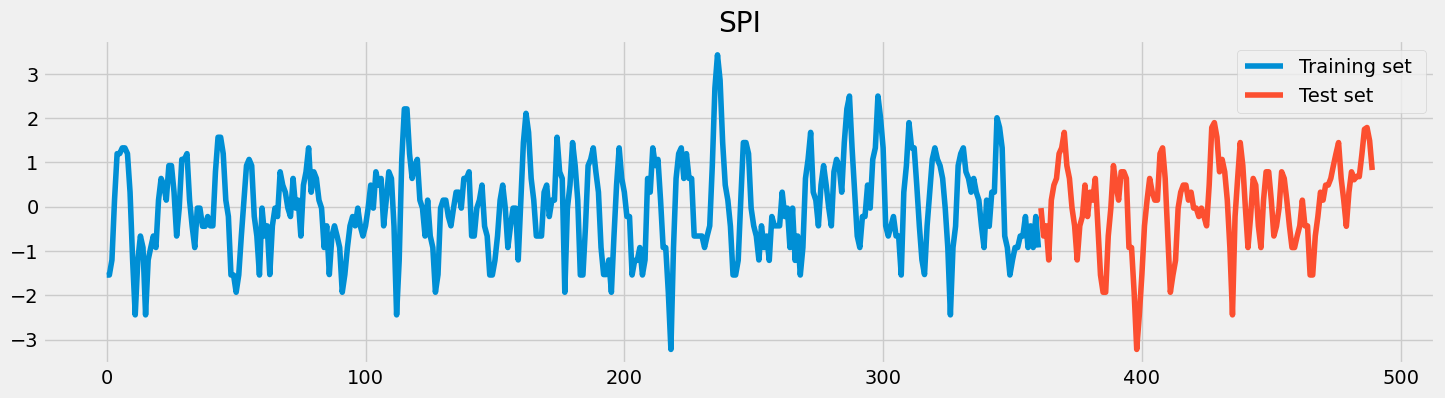

In [7]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["spi"][:361].plot(figsize=(16,4),legend=True)
dataset["spi"][361:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set ','Test set '])
plt.title('SPI')
plt.show()

In [8]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,361):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [11]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=500,batch_size=8)

Epoch 1/500
38/38 [==============================] - 124s 187ms/step - loss: 0.0459
Epoch 2/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0337
Epoch 3/500
38/38 [==============================] - 6s 158ms/step - loss: 0.0289
Epoch 4/500
38/38 [==============================] - 6s 167ms/step - loss: 0.0275
Epoch 5/500
38/38 [==============================] - 6s 157ms/step - loss: 0.0293
Epoch 6/500
38/38 [==============================] - 6s 148ms/step - loss: 0.0256
Epoch 7/500
38/38 [==============================] - 6s 153ms/step - loss: 0.0257
Epoch 8/500
38/38 [==============================] - 6s 150ms/step - loss: 0.0282
Epoch 9/500
38/38 [==============================] - 7s 177ms/step - loss: 0.0257
Epoch 10/500
38/38 [==============================] - 5s 137ms/step - loss: 0.0280
Epoch 11/500
38/38 [==============================] - 6s 160ms/step - loss: 0.0266
Epoch 12/500
38/38 [==============================] - 6s 162ms/step - loss: 0.0250
Epoch 13/50

38/38 [==============================] - 8s 218ms/step - loss: 0.0188
Epoch 100/500
38/38 [==============================] - 8s 205ms/step - loss: 0.0190
Epoch 101/500
38/38 [==============================] - 8s 208ms/step - loss: 0.0187
Epoch 102/500
38/38 [==============================] - 8s 211ms/step - loss: 0.0192
Epoch 103/500
38/38 [==============================] - 9s 234ms/step - loss: 0.0192
Epoch 104/500
38/38 [==============================] - 8s 196ms/step - loss: 0.0180
Epoch 105/500
38/38 [==============================] - 6s 168ms/step - loss: 0.0189
Epoch 106/500
38/38 [==============================] - 7s 193ms/step - loss: 0.0181
Epoch 107/500
38/38 [==============================] - 8s 199ms/step - loss: 0.0193
Epoch 108/500
38/38 [==============================] - 7s 189ms/step - loss: 0.0187
Epoch 109/500
38/38 [==============================] - 7s 193ms/step - loss: 0.0181
Epoch 110/500
38/38 [==============================] - 6s 166ms/step - loss: 0.0188
Epoch 

38/38 [==============================] - 7s 194ms/step - loss: 0.0157
Epoch 197/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0161
Epoch 198/500
38/38 [==============================] - 7s 186ms/step - loss: 0.0162
Epoch 199/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0165
Epoch 200/500
38/38 [==============================] - 8s 202ms/step - loss: 0.0155
Epoch 201/500
38/38 [==============================] - 7s 188ms/step - loss: 0.0155
Epoch 202/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0160
Epoch 203/500
38/38 [==============================] - 7s 180ms/step - loss: 0.0157
Epoch 204/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0160
Epoch 205/500
38/38 [==============================] - 6s 148ms/step - loss: 0.0156
Epoch 206/500
38/38 [==============================] - 7s 184ms/step - loss: 0.0153
Epoch 207/500
38/38 [==============================] - 6s 170ms/step - loss: 0.0164
Epoch 

38/38 [==============================] - 7s 186ms/step - loss: 0.0104
Epoch 294/500
38/38 [==============================] - 6s 160ms/step - loss: 0.0106
Epoch 295/500
38/38 [==============================] - 7s 186ms/step - loss: 0.0112
Epoch 296/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0103
Epoch 297/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0106
Epoch 298/500
38/38 [==============================] - 7s 171ms/step - loss: 0.0102
Epoch 299/500
38/38 [==============================] - 7s 181ms/step - loss: 0.0105
Epoch 300/500
38/38 [==============================] - 7s 173ms/step - loss: 0.0099
Epoch 301/500
38/38 [==============================] - 7s 171ms/step - loss: 0.0106
Epoch 302/500
38/38 [==============================] - 7s 175ms/step - loss: 0.0104
Epoch 303/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0104
Epoch 304/500
38/38 [==============================] - 6s 153ms/step - loss: 0.0109
Epoch 

38/38 [==============================] - 6s 152ms/step - loss: 0.0086
Epoch 391/500
38/38 [==============================] - 7s 180ms/step - loss: 0.0081
Epoch 392/500
38/38 [==============================] - 7s 186ms/step - loss: 0.0080
Epoch 393/500
38/38 [==============================] - 6s 158ms/step - loss: 0.0084
Epoch 394/500
38/38 [==============================] - 6s 169ms/step - loss: 0.0083
Epoch 395/500
38/38 [==============================] - 6s 165ms/step - loss: 0.0079
Epoch 396/500
38/38 [==============================] - 7s 181ms/step - loss: 0.0081
Epoch 397/500
38/38 [==============================] - 8s 202ms/step - loss: 0.0078
Epoch 398/500
38/38 [==============================] - 6s 166ms/step - loss: 0.0078
Epoch 399/500
38/38 [==============================] - 7s 185ms/step - loss: 0.0077
Epoch 400/500
38/38 [==============================] - 7s 187ms/step - loss: 0.0075
Epoch 401/500
38/38 [==============================] - 6s 153ms/step - loss: 0.0076
Epoch 

38/38 [==============================] - 3s 93ms/step - loss: 0.0064
Epoch 488/500
38/38 [==============================] - 3s 91ms/step - loss: 0.0063
Epoch 489/500
38/38 [==============================] - 3s 91ms/step - loss: 0.0063
Epoch 490/500
38/38 [==============================] - 4s 92ms/step - loss: 0.0068
Epoch 491/500
38/38 [==============================] - 3s 85ms/step - loss: 0.0062
Epoch 492/500
38/38 [==============================] - 3s 87ms/step - loss: 0.0067
Epoch 493/500
38/38 [==============================] - 3s 80ms/step - loss: 0.0063
Epoch 494/500
38/38 [==============================] - 3s 88ms/step - loss: 0.0062
Epoch 495/500
38/38 [==============================] - 3s 84ms/step - loss: 0.0066
Epoch 496/500
38/38 [==============================] - 3s 85ms/step - loss: 0.0062
Epoch 497/500
38/38 [==============================] - 3s 86ms/step - loss: 0.0072
Epoch 498/500
38/38 [==============================] - 3s 82ms/step - loss: 0.0067
Epoch 499/500
38/3

In [13]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["spi"][:361],dataset["spi"][361:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [14]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,189):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 6s 32ms/step


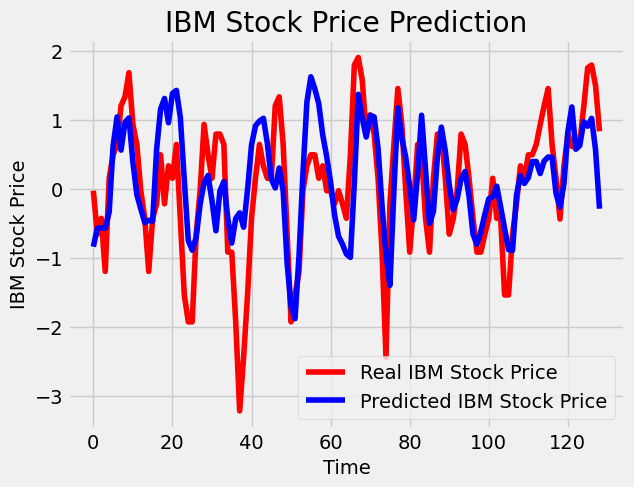

In [15]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [16]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)


The root mean squared error is 0.7490762213481631.


In [17]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [18]:
evaluation_metrics = calculate_evaluation_metrics(test_set,predicted_stock_price)
print(evaluation_metrics)

{'ME': -0.06814795550969681, 'MAE': 0.5830301167521366, 'MSE': 0.5611151853892422, 'RMSE': 0.7490762213481631, 'NRMSE': 0.1463039494820631, 'PBIAS': -129.09084083334648, 'RSR': 0.7846198985835525, 'rSD': 0.7813661470299442, 'NSE': 0.38437161474673587, 'mNSE': 0.38437161474673587, 'rNSE': 0.421713905959565, 'd': 0.7670611515428527, 'md': 0.7670611515428527, 'rd': 0.7670611515428527, 'cp': 0.7670611515428527, 'r': 0.7670611515428527, 'R2': 0.38437161474673587}


Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [19]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=500,batch_size=8)

C:\Users\asitg\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/500
38/38 [==============================] - 105s 180ms/step - loss: 0.0552
Epoch 2/500
38/38 [==============================] - 7s 187ms/step - loss: 0.0259
Epoch 3/500
38/38 [==============================] - 7s 180ms/step - loss: 0.0269
Epoch 4/500
38/38 [==============================] - 7s 192ms/step - loss: 0.0247
Epoch 5/500
38/38 [==============================] - 7s 172ms/step - loss: 0.0244
Epoch 6/500
38/38 [==============================] - 7s 176ms/step - loss: 0.0246
Epoch 7/500
38/38 [==============================] - 7s 192ms/step - loss: 0.0246
Epoch 8/500
38/38 [==============================] - 7s 173ms/step - loss: 0.0253
Epoch 9/500
38/38 [==============================] - 8s 209ms/step - loss: 0.0239
Epoch 10/500
38/38 [==============================] - 7s 179ms/step - loss: 0.0241
Epoch 11/500
38/38 [==============================] - 6s 173ms/step - loss: 0.0251
Epoch 12/500
38/38 [==============================] - 8s 199ms/step - loss: 0.0237
Epoch 13/50

38/38 [==============================] - 8s 206ms/step - loss: 0.0226
Epoch 100/500
38/38 [==============================] - 8s 213ms/step - loss: 0.0224
Epoch 101/500
38/38 [==============================] - 8s 205ms/step - loss: 0.0231
Epoch 102/500
38/38 [==============================] - 7s 186ms/step - loss: 0.0231
Epoch 103/500
38/38 [==============================] - 8s 199ms/step - loss: 0.0222
Epoch 104/500
38/38 [==============================] - 7s 173ms/step - loss: 0.0228
Epoch 105/500
38/38 [==============================] - 7s 193ms/step - loss: 0.0222
Epoch 106/500
38/38 [==============================] - 8s 206ms/step - loss: 0.0220
Epoch 107/500
38/38 [==============================] - 7s 182ms/step - loss: 0.0216
Epoch 108/500
38/38 [==============================] - 7s 194ms/step - loss: 0.0219
Epoch 109/500
38/38 [==============================] - 8s 197ms/step - loss: 0.0228
Epoch 110/500
38/38 [==============================] - 7s 184ms/step - loss: 0.0222
Epoch 

38/38 [==============================] - 8s 205ms/step - loss: 0.0167
Epoch 197/500
38/38 [==============================] - 8s 208ms/step - loss: 0.0156
Epoch 198/500
38/38 [==============================] - 9s 228ms/step - loss: 0.0163
Epoch 199/500
38/38 [==============================] - 8s 211ms/step - loss: 0.0164
Epoch 200/500
38/38 [==============================] - 9s 234ms/step - loss: 0.0167
Epoch 201/500
38/38 [==============================] - 9s 239ms/step - loss: 0.0161
Epoch 202/500
38/38 [==============================] - 10s 253ms/step - loss: 0.0157
Epoch 203/500
38/38 [==============================] - 9s 237ms/step - loss: 0.0164
Epoch 204/500
38/38 [==============================] - 10s 256ms/step - loss: 0.0158
Epoch 205/500
38/38 [==============================] - 9s 228ms/step - loss: 0.0155
Epoch 206/500
38/38 [==============================] - 8s 225ms/step - loss: 0.0166
Epoch 207/500
38/38 [==============================] - 8s 210ms/step - loss: 0.0155
Epoc

38/38 [==============================] - 4s 109ms/step - loss: 0.0138
Epoch 294/500
38/38 [==============================] - 4s 105ms/step - loss: 0.0135
Epoch 295/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0143
Epoch 296/500
38/38 [==============================] - 4s 115ms/step - loss: 0.0137
Epoch 297/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0150
Epoch 298/500
38/38 [==============================] - 4s 114ms/step - loss: 0.0143
Epoch 299/500
38/38 [==============================] - 5s 120ms/step - loss: 0.0142
Epoch 300/500
38/38 [==============================] - 4s 105ms/step - loss: 0.0144
Epoch 301/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0141
Epoch 302/500
38/38 [==============================] - 4s 109ms/step - loss: 0.0134
Epoch 303/500
38/38 [==============================] - 4s 113ms/step - loss: 0.0137
Epoch 304/500
38/38 [==============================] - 4s 101ms/step - loss: 0.0143
Epoch 

38/38 [==============================] - 4s 113ms/step - loss: 0.0123
Epoch 391/500
38/38 [==============================] - 4s 104ms/step - loss: 0.0127
Epoch 392/500
38/38 [==============================] - 4s 114ms/step - loss: 0.0121
Epoch 393/500
38/38 [==============================] - 4s 115ms/step - loss: 0.0122
Epoch 394/500
38/38 [==============================] - 4s 103ms/step - loss: 0.0124
Epoch 395/500
38/38 [==============================] - 4s 111ms/step - loss: 0.0119
Epoch 396/500
38/38 [==============================] - 4s 108ms/step - loss: 0.0126
Epoch 397/500
38/38 [==============================] - 4s 103ms/step - loss: 0.0123
Epoch 398/500
38/38 [==============================] - 4s 110ms/step - loss: 0.0119
Epoch 399/500
38/38 [==============================] - 4s 106ms/step - loss: 0.0130
Epoch 400/500
38/38 [==============================] - 4s 115ms/step - loss: 0.0123
Epoch 401/500
38/38 [==============================] - 4s 105ms/step - loss: 0.0124
Epoch 

38/38 [==============================] - 2s 48ms/step - loss: 0.0111
Epoch 489/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0121
Epoch 490/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0116
Epoch 491/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0109
Epoch 492/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0133
Epoch 493/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0113
Epoch 494/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0110
Epoch 495/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0106
Epoch 496/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0118
Epoch 497/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0115
Epoch 498/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0124
Epoch 499/500
38/38 [==============================] - 2s 48ms/step - loss: 0.0137
Epoch 500/500
38/3

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [21]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,189):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

5/5 [==============================] - 2s 21ms/step


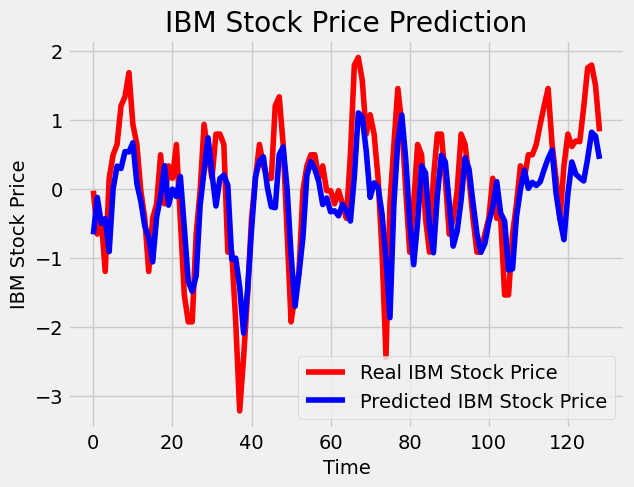

In [22]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [23]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 0.6575591353944171.


In [24]:
evaluation_metrics = calculate_evaluation_metrics(test_set,GRU_predicted_stock_price)
print(evaluation_metrics)

{'ME': 0.23523959954850404, 'MAE': 0.5260428913900369, 'MSE': 0.43238401654065334, 'RMSE': 0.6575591353944171, 'NRMSE': 0.12842951863172208, 'PBIAS': 445.60805200817964, 'RSR': 0.6887603256145213, 'rSD': 0.6431772520912657, 'NSE': 0.5256092138593786, 'mNSE': 0.5256092138593786, 'rNSE': 0.5766729541957084, 'd': 0.8170642655184911, 'md': 0.8170642655184911, 'rd': 0.8170642655184911, 'cp': 0.8170642655184911, 'r': 0.8170642655184911, 'R2': 0.5256092138593786}
